# DATA PRE-PROCESSING

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [ ]:
# Load the dataset
file_path = '/content/Loan_default.csv'  # Adjust path if needed
loan_data = pd.read_csv(file_path)

In [ ]:
# Drop unique identifier
loan_data = loan_data.drop('LoanID', axis=1)

In [ ]:
# Encode categorical features using one-hot encoding or label encoding
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

In [ ]:
# Use one-hot encoding for categorical variables
loan_data = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)

In [ ]:
# Split features and target
X = loan_data.drop('Default', axis=1)
y = loan_data['Default']

In [ ]:
# Address class imbalance in target variable using SMOTE
sm = SMOTE(random_state=42)

# Before applying SMOTE, handle NaN values in 'y'
# Remove rows with NaN in 'Default' column
loan_data = loan_data.dropna(subset=['Default'])

# Split features and target AFTER handling NaNs
X = loan_data.drop('Default', axis=1)
y = loan_data['Default']

X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# Standardize numerical features
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                  'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                  'LoanTerm', 'DTIRatio']

In [ ]:
scaler = StandardScaler()
X_res[numerical_cols] = scaler.fit_transform(X_res[numerical_cols])

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Check the processed data
print("Processed Data Shape:", X_train.shape, X_test.shape)
print("Class Distribution in Training Set:", y_train.value_counts())

Processed Data Shape: (361110, 24) (90278, 24)
Class Distribution in Training Set: Default
0    180567
1    180543
Name: count, dtype: int64


In [ ]:
!ls

Loan_default.csv  sample_data


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8501739072642283
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     45127
           1       0.86      0.83      0.85     45151

    accuracy                           0.85     90278
   macro avg       0.85      0.85      0.85     90278
weighted avg       0.85      0.85      0.85     90278



# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9171226655442078
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     45127
           1       0.97      0.86      0.91     45151

    accuracy                           0.92     90278
   macro avg       0.92      0.92      0.92     90278
weighted avg       0.92      0.92      0.92     90278



# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8491105252663993
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     45127
           1       0.84      0.86      0.85     45151

    accuracy                           0.85     90278
   macro avg       0.85      0.85      0.85     90278
weighted avg       0.85      0.85      0.85     90278



# NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Initialize the neural network model
nn_model = Sequential()

# Input layer (size of the input data)
nn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
nn_model.add(Dense(1, activation='sigmoid'))  # Binary classification (loan default or not)

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Early stopping to prevent overfitting (stop training when the validation accuracy stops improving)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the neural network model
history = nn_model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping],
                       verbose=1)

# Predict and evaluate the model
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype('int32')  # Sigmoid output to binary

# Evaluate and print the performance
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8417 - loss: 0.3538 - val_accuracy: 0.8798 - val_loss: 0.2710
Epoch 2/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8792 - loss: 0.2759 - val_accuracy: 0.8851 - val_loss: 0.2623
Epoch 3/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8838 - loss: 0.2664 - val_accuracy: 0.8874 - val_loss: 0.2579
Epoch 4/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8837 - loss: 0.2653 - val_accuracy: 0.8857 - val_loss: 0.2584
Epoch 5/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8855 - loss: 0.2626 - val_accuracy: 0.8875 - val_loss: 0.2576
Epoch 6/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8857 - loss: 0.2622 - val_accuracy: 0.8887 - val_loss: 0.2564
Epoch 7/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8857 - loss: 0.2626 - val_accuracy: 0.8884 - val_loss: 0.2565
Epoch 8/50
11285/11285 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

# K-NEAREST NEIGHBORS (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8831609029885464
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88     45127
           1       0.86      0.92      0.89     45151

    accuracy                           0.88     90278
   macro avg       0.88      0.88      0.88     90278
weighted avg       0.88      0.88      0.88     90278



# NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8507499058463857
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     45127
           1       0.86      0.84      0.85     45151

    accuracy                           0.85     90278
   macro avg       0.85      0.85      0.85     90278
weighted avg       0.85      0.85      0.85     90278



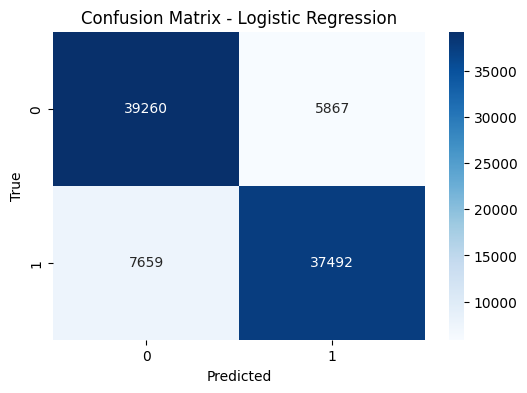

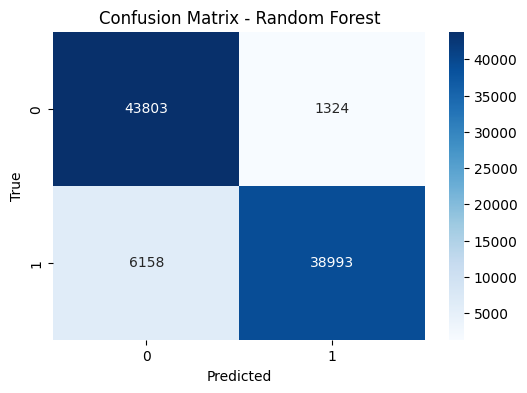

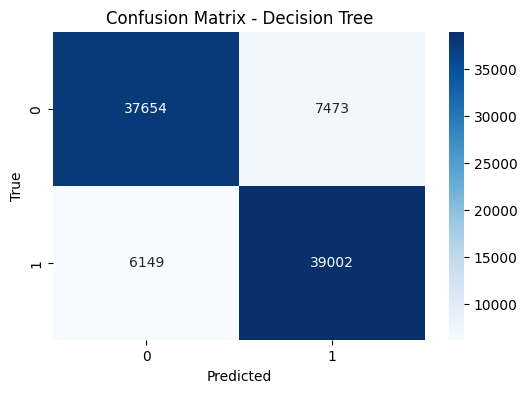

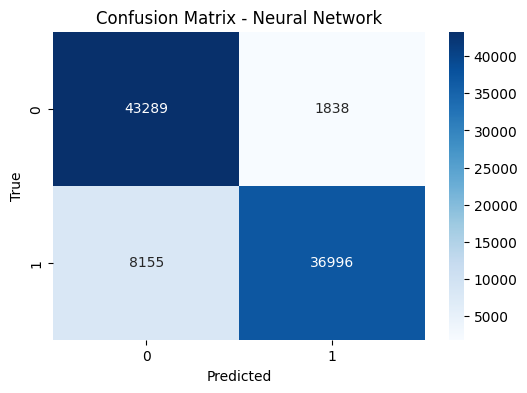

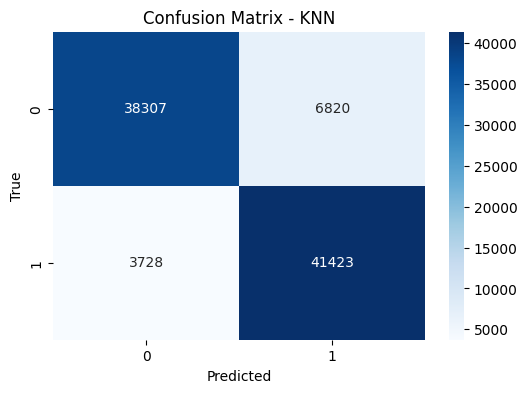

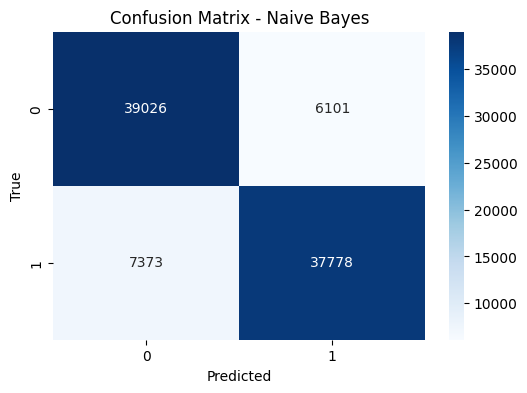

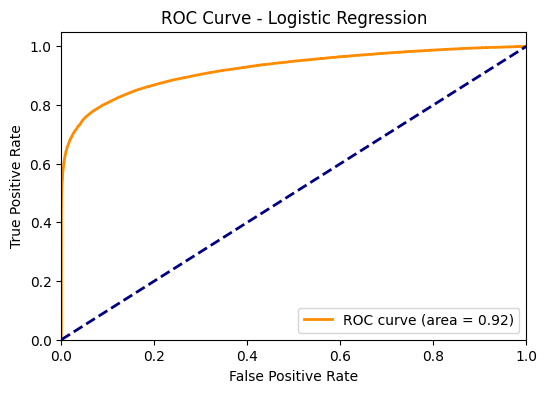

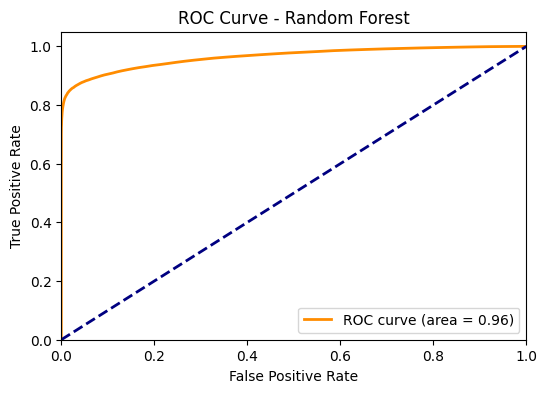

2822/2822 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


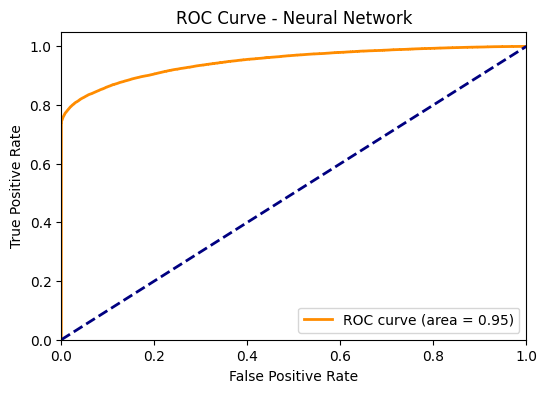

In [ ]:
# prompt: give the code for comparing values in the table with some visuals

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_lr, y_pred_rf, y_pred_dt, y_pred_nn, y_pred_knn, y_pred_nb are already defined

# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

from sklearn.metrics import confusion_matrix
# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")


# Function to plot ROC curve
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Assuming you have probability predictions for each model. If not, adjust accordingly.
# Example for Logistic Regression (adjust for other models):
y_prob_lr = lr_model.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_prob_lr, "Logistic Regression")


# Example for Random Forest:
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_prob_rf, "Random Forest")


# Example for Neural Network:
y_prob_nn = nn_model.predict(X_test)
plot_roc_curve(y_test, y_prob_nn, "Neural Network")

In [ ]:
# prompt: give the code to create comparison table for the algorithms

import pandas as pd

# Assuming you have already calculated accuracy, precision, recall, and F1-score for each model
# Store the results in a dictionary
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Neural Network', 'KNN', 'Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_nn), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb)],
    'Precision': [classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_nn, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['precision']],
    'Recall': [classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_nn, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['recall']],
    'F1-score': [classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_nn, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['f1-score']]
}

# Create a pandas DataFrame
comparison_table = pd.DataFrame(model_results)

# Display the comparison table
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.850174,0.850725,0.850179,0.850116
1,Random Forest,0.917123,0.921952,0.917137,0.916887
2,Decision Tree,0.849111,0.849413,0.849107,0.849077
3,Neural Network,0.889309,0.897074,0.889327,0.888768
4,KNN,0.883161,0.884972,0.883152,0.883022
5,Naive Bayes,0.850750,0.851027,0.850754,0.850721


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['F1-score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('F1-score')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# prompt: give code for table for the comparison of algorithms

# Assuming y_pred_lr, y_pred_rf, y_pred_dt, y_pred_nn, y_pred_knn, y_pred_nb are already defined
# ... (previous code)

# Assuming you have already calculated accuracy, precision, recall, and F1-score for each model
# Store the results in a dictionary
model_results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Neural Network', 'KNN', 'Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_nn), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb)],
    'Precision': [classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_nn, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['precision'],
                  classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['precision']],
    'Recall': [classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_nn, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['recall'],
               classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['recall']],
    'F1-score': [classification_report(y_test, y_pred_lr, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_rf, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_nn, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['f1-score'],
                 classification_report(y_test, y_pred_nb, output_dict=True)['macro avg']['f1-score']]
}

# Create a pandas DataFrame
comparison_table = pd.DataFrame(model_results)

# Display the comparison table
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.850174,0.850725,0.850179,0.850116
1,Random Forest,0.917123,0.921952,0.917137,0.916887
2,Decision Tree,0.849111,0.849413,0.849107,0.849077
3,Neural Network,0.889309,0.897074,0.889327,0.888768
4,KNN,0.883161,0.884972,0.883152,0.883022
5,Naive Bayes,0.850750,0.851027,0.850754,0.850721
